## Prepare the workstation

#### Import necessary packages and libraries

In [1]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

#### Formatting of plots

In [2]:
# Set figure size.
sns.set(rc={'figure.figsize':(16, 8)})

# Colour palette to make charts look better.
sns.set_palette('colorblind') 

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid') 

# Font size of the axes titles.
plt.rc('axes', titlesize=22) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=20)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=18,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=18,color='#4f4e4e')  

# Font size of the legend.
plt.rc('legend', fontsize=18)

# Default text size.
plt.rc('font', size=18)  

#### Load the data

In [3]:
# Load the CSV file(s) as reviews.
clusters = pd.read_csv('clustered_data.csv') 

# View the DataFrame.
clusters.head()

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023/04/18,MFS,375.40,0.00,2023/04/18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023/03/28,DX Freight,236.61,0.00,2023/03/28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023/03/30,DX Freight,70.58,13.20,2023/03/30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,3,26.84,2275231,483789,2023/03/27,DX Express,76.95,7.22,2023/03/27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,4,26.84,2285334,483789,2023/04/05,DX Express,147.30,0.00,2023/04/05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


#### Explore the data

In [4]:
# Any missing values?
clusters.isna().sum()

Unnamed: 0        0
distance          0
OrderID           0
WebsiteID         0
OrderDate         0
Courier           0
ProductsExVAT     0
DeliveryExVAT     0
DateDespatched    0
DeliveryCost      0
Weight            0
Volume (m3)       0
Pallets           0
id                0
Outward Code      0
latitude          0
longitude         0
Cluster Label     0
dtype: int64

In [5]:
# Check for duplicates.
duplicates = clusters.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [6]:
# Explore the data.
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4119 non-null   int64  
 1   distance        4119 non-null   float64
 2   OrderID         4119 non-null   int64  
 3   WebsiteID       4119 non-null   int64  
 4   OrderDate       4119 non-null   object 
 5   Courier         4119 non-null   object 
 6   ProductsExVAT   4119 non-null   float64
 7   DeliveryExVAT   4119 non-null   float64
 8   DateDespatched  4119 non-null   object 
 9   DeliveryCost    4119 non-null   float64
 10  Weight          4119 non-null   float64
 11  Volume (m3)     4119 non-null   float64
 12  Pallets         4119 non-null   float64
 13  id              4119 non-null   int64  
 14  Outward Code    4119 non-null   object 
 15  latitude        4119 non-null   float64
 16  longitude       4119 non-null   float64
 17  Cluster Label   4119 non-null   i

In [7]:
# View data shape.
print(clusters.shape)

(4119, 18)


In [8]:
# Descriptive statistics.
clusters.describe()

,Unnamed: 0,distance,OrderID,WebsiteID,ProductsExVAT,DeliveryExVAT,DeliveryCost,Weight,Volume (m3),Pallets,id,latitude,longitude,Cluster Label
count,4119.000000,4119.000000,4.119000e+03,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,2059.000000,28.627235,2.287290e+06,618688.283807,263.046868,4.542620,25.536065,86.429298,0.816669,0.533654,1352.073076,52.452509,-1.555242,1.984219
std,1189.197208,12.847420,7.017908e+03,244742.864409,459.368097,6.938974,41.788015,219.608735,2.102269,1.276937,897.171551,0.326902,0.506446,1.209078
min,0.000000,0.000000,2.275149e+06,7700.000000,0.000000,0.000000,6.760000,0.000000,0.000000,0.000100,44.000000,51.728383,-2.706694,0.000000
25%,1029.500000,18.420000,2.281211e+06,518808.000000,67.830000,0.000000,6.800000,14.135000,0.069967,0.055556,598.000000,52.217508,-1.968468,1.000000
50%,2059.000000,28.460000,2.287131e+06,671388.000000,138.720000,0.000000,14.900000,33.540000,0.233600,0.170247,1461.000000,52.485945,-1.542241,2.000000
75%,3088.500000,39.870000,2.293480e+06,824232.000000,288.455000,7.200000,34.460000,83.290000,0.805100,0.540644,1839.500000,52.664858,-1.187850,3.000000
max,4118.000000,49.820000,2.299520e+06,901726.000000,11450.400000,48.300000,1297.270000,7305.400000,65.187500,40.000000,2939.000000,53.101000,-0.435438,4.000000


In [9]:
# View the dataframe.
clusters.head()

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023/04/18,MFS,375.40,0.00,2023/04/18,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023/03/28,DX Freight,236.61,0.00,2023/03/28,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023/03/30,DX Freight,70.58,13.20,2023/03/30,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,3,26.84,2275231,483789,2023/03/27,DX Express,76.95,7.22,2023/03/27,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,4,26.84,2285334,483789,2023/04/05,DX Express,147.30,0.00,2023/04/05,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


#### Add a column for the day of the week

In [10]:
# Convert 'DateDespatched' column to datetime data type.
clusters['DateDespatched'] = pd.to_datetime(clusters['DateDespatched'])

# Calculate the day of the week.
clusters['day_of_week'] = clusters['DateDespatched'].dt.strftime('%A')

# Reorder the columns.
column_order = ['Unnamed: 0', 'distance', 'OrderID', 
                'WebsiteID', 'OrderDate', 'Courier', 
                'ProductsExVAT', 'DeliveryExVAT', 'DateDespatched', 
                'day_of_week', 'DeliveryCost', 'Weight', 
                'Volume (m3)', 'Pallets', 'id', 'Outward Code', 
                'latitude', 'longitude', 'Cluster Label']
clusters = clusters.reindex(columns=column_order)

# Print the updated dataframe.
clusters.head()

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,day_of_week,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023/04/18,MFS,375.40,0.00,2023-04-18,Tuesday,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023/03/28,DX Freight,236.61,0.00,2023-03-28,Tuesday,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023/03/30,DX Freight,70.58,13.20,2023-03-30,Thursday,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,3,26.84,2275231,483789,2023/03/27,DX Express,76.95,7.22,2023-03-27,Monday,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,4,26.84,2285334,483789,2023/04/05,DX Express,147.30,0.00,2023-04-05,Wednesday,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1


In [11]:
# Check the dates and days of a week in the data.
print(clusters['DateDespatched'].dt.date.unique())
print(clusters['day_of_week'].unique())

[datetime.date(2023, 4, 18) datetime.date(2023, 3, 28)
 datetime.date(2023, 3, 30) datetime.date(2023, 3, 27)
 datetime.date(2023, 4, 5) datetime.date(2023, 4, 14)
 datetime.date(2023, 4, 21) datetime.date(2023, 4, 4)
 datetime.date(2023, 4, 13) datetime.date(2023, 4, 19)
 datetime.date(2023, 4, 17) datetime.date(2023, 3, 31)
 datetime.date(2023, 4, 11) datetime.date(2023, 4, 20)
 datetime.date(2023, 4, 3) datetime.date(2023, 4, 24)
 datetime.date(2023, 3, 29) datetime.date(2023, 4, 12)
 datetime.date(2023, 4, 6) datetime.date(2023, 4, 10)
 datetime.date(2023, 4, 2)]
['Tuesday' 'Thursday' 'Monday' 'Wednesday' 'Friday' 'Sunday']


#### Drop rows that fall on weekends and bank holidays

In [12]:
# Drop the rows that fall on the weekend.
weekend_mask = clusters['day_of_week'].isin(['Saturday', 'Sunday'])
clusters_wd = clusters[~weekend_mask]

# Drop the rows that fall on bank holidays.
bank_holidays = ['2023-04-07', '2023-04-10']  # Update with your specific bank holidays
clusters_wd = clusters_wd[~clusters_wd['DateDespatched'].isin(bank_holidays)]

# View the dataframe.
clusters_wd

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,day_of_week,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023/04/18,MFS,375.40,0.00,2023-04-18,Tuesday,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023/03/28,DX Freight,236.61,0.00,2023-03-28,Tuesday,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023/03/30,DX Freight,70.58,13.20,2023-03-30,Thursday,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
3,3,26.84,2275231,483789,2023/03/27,DX Express,76.95,7.22,2023-03-27,Monday,6.81,17.77,0.040200,0.030342,766,DY6,52.496759,-2.173682,1
4,4,26.84,2285334,483789,2023/04/05,DX Express,147.30,0.00,2023-04-05,Wednesday,11.46,34.70,0.100552,0.052361,766,DY6,52.496759,-2.173682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,16.23,2282828,884822,2023/04/03,DX Express,36.26,7.21,2023-04-03,Monday,6.80,4.86,0.108550,0.055556,50,B15,52.462825,-1.927011,1
4115,4115,34.22,2283491,896767,2023/04/04,DX Express,111.40,19.99,2023-04-04,Tuesday,8.04,23.80,0.127600,0.185185,2937,WV7,52.633048,-2.270047,1
4116,4116,34.22,2294508,896767,2023/04/18,DX Freight,90.09,32.22,2023-04-18,Tuesday,10.92,18.90,1.411200,0.750000,2937,WV7,52.633048,-2.270047,1
4117,4117,38.17,2294964,901125,2023/04/18,DX Freight,278.64,0.00,2023-04-18,Tuesday,14.77,29.88,4.070664,1.511111,1456,LE13,52.763672,-0.890501,2


#### Check the number of days in the dataframe, ex weekends and bank holidays

In [13]:
# Calculate the number of unique days covered
num_days = len(clusters_wd['DateDespatched'].dt.date.unique())

# Print the number of days covered
print("Number of days covered:", num_days)

Number of days covered: 19


#### Create subsets of the data

In [14]:
# Create subsets for each cluster
cluster_0 = clusters_wd[clusters_wd['Cluster Label'] == 0]
cluster_1 = clusters_wd[clusters_wd['Cluster Label'] == 1]
cluster_2 = clusters_wd[clusters_wd['Cluster Label'] == 2]
cluster_3 = clusters_wd[clusters_wd['Cluster Label'] == 3]
cluster_4 = clusters_wd[clusters_wd['Cluster Label'] == 4]

# Print the number of data points in each cluster
print(f"Cluster 0: {len(cluster_0)} points")
print(f"Cluster 1: {len(cluster_1)} points")
print(f"Cluster 2: {len(cluster_2)} points")
print(f"Cluster 3: {len(cluster_3)} points")
print(f"Cluster 4: {len(cluster_4)} points")

Cluster 0: 382 points
Cluster 1: 1283 points
Cluster 2: 1078 points
Cluster 3: 760 points
Cluster 4: 611 points


#### View the cluster subsets (0 and 3)

In [15]:
# View cluster 0.
cluster_0

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,day_of_week,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
649,649,19.50,2280694,50656,2023/03/31,DX Freight,284.40,0.00,2023-03-31,Friday,27.72,63.00,4.704000,2.500000,118,B96,52.264208,-1.973759,0
650,650,19.50,2299385,901624,2023/04/22,MFS,226.95,0.00,2023-04-24,Monday,34.46,125.00,0.031360,0.208333,118,B96,52.264208,-1.973759,0
980,980,26.37,2281195,63911,2023/03/31,DX Freight,93.48,12.34,2023-03-31,Friday,11.02,18.20,0.338240,0.333333,2907,WR9,52.272714,-2.154912,0
981,981,26.37,2294928,63911,2023/04/18,DX Freight,223.56,0.00,2023-04-18,Tuesday,14.00,27.60,1.488400,1.000000,2907,WR9,52.272714,-2.154912,0
982,982,26.37,2291845,413108,2023/04/14,DX Freight,289.18,0.00,2023-04-14,Friday,38.65,91.00,0.684860,0.649074,2907,WR9,52.272714,-2.154912,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4080,4080,42.02,2278348,765329,2023/03/29,DX Express,89.01,9.53,2023-03-29,Wednesday,8.99,27.00,0.093000,0.033333,2898,WR15,52.291102,-2.542799,0
4081,4081,42.02,2278029,887479,2023/03/29,DX Freight,110.58,0.00,2023-03-29,Wednesday,12.57,23.40,0.895799,0.624167,2898,WR15,52.291102,-2.542799,0
4082,4082,42.02,2285489,899040,2023/04/05,DX Express,294.29,0.00,2023-04-05,Wednesday,8.35,25.00,0.063000,0.047037,2898,WR15,52.291102,-2.542799,0
4101,4101,25.69,2296646,812779,2023/04/19,DX Express,57.48,7.17,2023-04-19,Wednesday,6.76,18.28,0.062000,0.022222,2904,WR7,52.184112,-2.066454,0


In [16]:
# View cluster 3.
cluster_3

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,day_of_week,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
11,11,43.04,2292996,9759,2023/04/16,DX Freight,148.41,0.00,2023-04-17,Monday,14.77,29.24,0.219678,0.200025,1934,OX18,51.767526,-1.582311,3
12,12,43.04,2280292,99458,2023/03/30,MFS,425.52,0.00,2023-03-31,Friday,40.07,75.60,2.095200,1.000000,1934,OX18,51.767526,-1.582311,3
13,13,43.04,2298694,99458,2023/04/21,MFS,649.20,0.00,2023-04-21,Friday,78.54,148.60,2.191200,1.106667,1934,OX18,51.767526,-1.582311,3
14,14,43.04,2287868,297632,2023/04/11,DX Express,108.90,0.00,2023-04-11,Tuesday,6.77,13.92,0.109280,0.097749,1934,OX18,51.767526,-1.582311,3
15,15,43.04,2297271,524321,2023/04/20,DX Freight,677.11,0.00,2023-04-20,Thursday,47.89,115.93,1.679950,0.896429,1934,OX18,51.767526,-1.582311,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4075,4075,7.58,2279090,763672,2023/03/29,DX Freight,21.35,12.34,2023-03-30,Thursday,11.02,2.50,0.034587,0.015675,581,CV12,52.480709,-1.458551,3
4076,4076,7.58,2287171,845916,2023/04/07,DX Express,94.82,7.20,2023-04-11,Tuesday,6.79,19.57,0.128232,0.095960,581,CV12,52.480709,-1.458551,3
4077,4077,7.58,2278254,851643,2023/03/29,DX Express,23.60,7.21,2023-04-06,Thursday,6.80,2.80,0.008000,0.003086,581,CV12,52.480709,-1.458551,3
4078,4078,7.58,2284499,898851,2023/04/04,DX Express,19.73,7.20,2023-04-05,Wednesday,6.79,4.54,0.007000,0.005952,581,CV12,52.480709,-1.458551,3


## Whole data set analysis

#### Number of deliveries, daily, by customer

In [37]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily count.
daily_count = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])['DeliveryExVAT'].count().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily count.
cluster_del_count = daily_count.groupby('Cluster Label')['DeliveryExVAT'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Create a dictionary mapping cluster labels to names.
cluster_names = {
    0: 'Worcester/Gloucester',
    1: 'Birmingham',
    2: 'Leicester/Nottingham',
    3: 'Oxford',
    4: 'Milton Keynes'
}

# Replace cluster labels with names.
cluster_del_count['Cluster Label'] = cluster_del_count['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_del_count.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_del_count

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,5,30,20.11
1,Birmingham,16,87,67.53
2,Leicester/Nottingham,12,77,56.74
3,Oxford,11,65,40.00
4,Milton Keynes,2,47,32.16


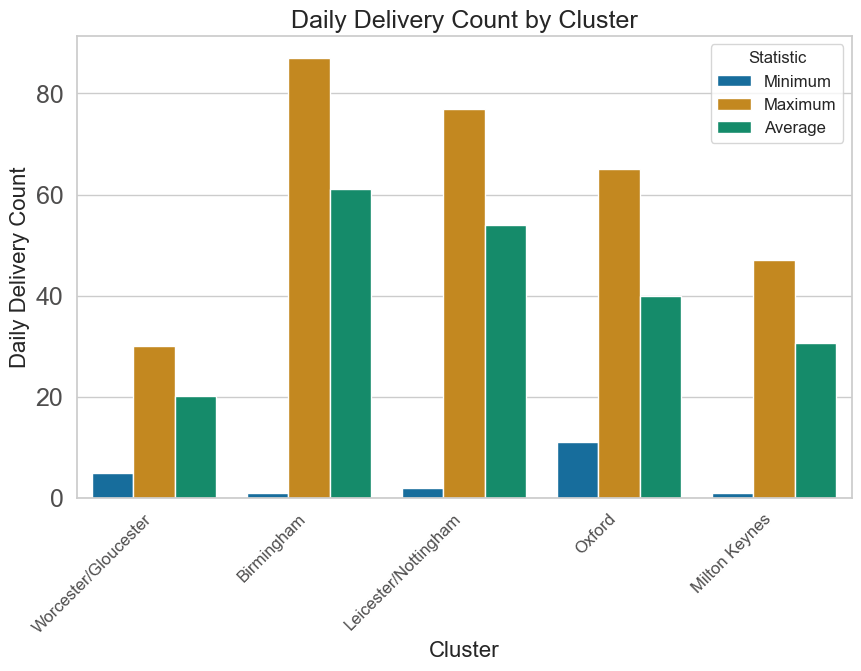

In [18]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_del_count.melt(id_vars='Cluster Name',
                              value_vars=['Minimum', 'Maximum', 'Average'],
                              var_name='Statistic',
                              value_name='Delivery Count')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Delivery Count', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Daily Delivery Count', fontsize=16)
plt.title('Daily Delivery Count by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

#### Delivery charge to customers, daily, by cluster

In [38]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily aggregate.
daily_aggregate = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])\
['DeliveryExVAT'].sum().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily aggregate.
cluster_del_charge = daily_aggregate.groupby('Cluster Label')['DeliveryExVAT'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Replace cluster labels with names.
cluster_del_charge['Cluster Label'] = cluster_del_charge['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_del_charge.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_del_charge

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,7.17,119.30,75.44
1,Birmingham,68.66,516.04,293.05
2,Leicester/Nottingham,69.59,382.15,256.54
3,Oxford,57.36,308.14,187.58
4,Milton Keynes,14.34,292.31,170.07


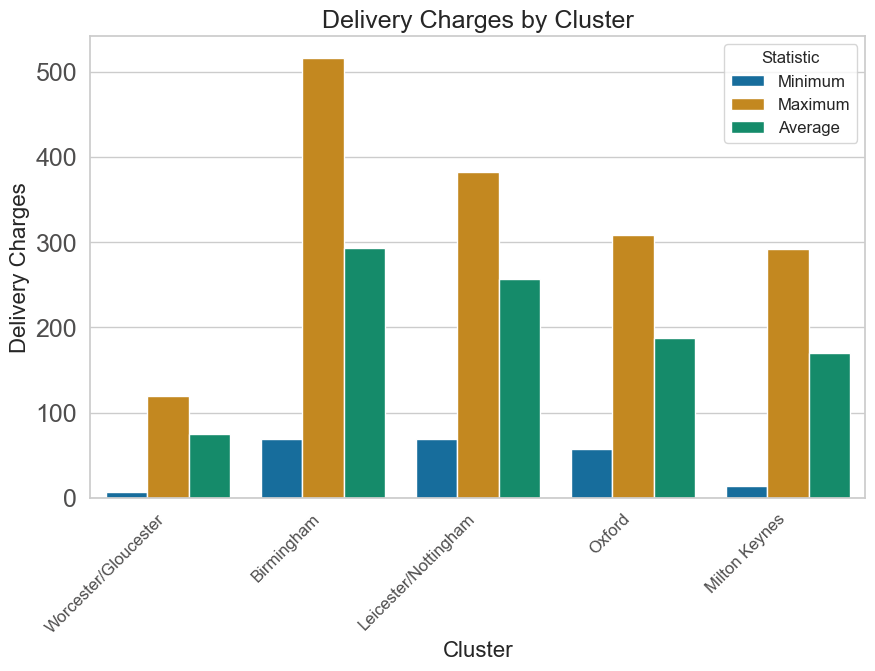

In [39]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_del_charge.melt(id_vars='Cluster Name', 
                                      value_vars=['Minimum', 'Maximum', 'Average'], 
                                      var_name='Statistic', 
                                      value_name='Delivery Charges')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Delivery Charges', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Delivery Charges', fontsize=16)
plt.title('Delivery Charges by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

#### Delivery cost to Kite, daily, by cluster

In [40]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily aggregate.
daily_aggregate = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])\
['DeliveryCost'].sum().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily aggregate.
cluster_del_cost = daily_aggregate.groupby('Cluster Label')['DeliveryCost'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Replace cluster labels with names.
cluster_del_cost['Cluster Label'] = cluster_del_cost['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_del_cost.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_del_cost

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,109.92,828.84,470.17
1,Birmingham,297.12,3095.48,1835.89
2,Leicester/Nottingham,128.57,2548.23,1476.86
3,Oxford,103.87,1720.24,966.66
4,Milton Keynes,13.52,1288.78,774.39


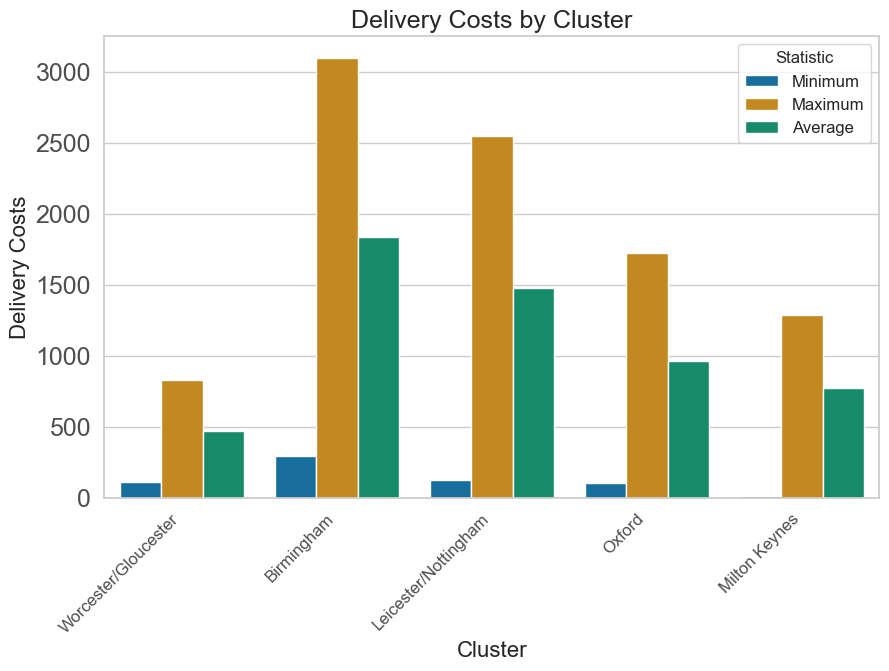

In [41]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_del_cost.melt(id_vars='Cluster Name', 
                                    value_vars=['Minimum', 'Maximum', 'Average'], 
                                    var_name='Statistic', 
                                    value_name='Delivery Costs')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Delivery Costs', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Delivery Costs', fontsize=16)
plt.title('Delivery Costs by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

#### Weight of freight, daily, by cluster

In [42]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily aggregate.
daily_aggregate = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])\
['Weight'].sum().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily aggregate.
cluster_weight = daily_aggregate.groupby('Cluster Label')['Weight'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Replace cluster labels with names.
cluster_weight['Cluster Label'] = cluster_weight['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_weight.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_weight

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,378.46,2542.48,1470.47
1,Birmingham,1264.32,13277.41,6825.95
2,Leicester/Nottingham,206.69,11095.31,5087.54
3,Oxford,184.99,6187.42,2978.58
4,Milton Keynes,22.16,4985.42,2330.10


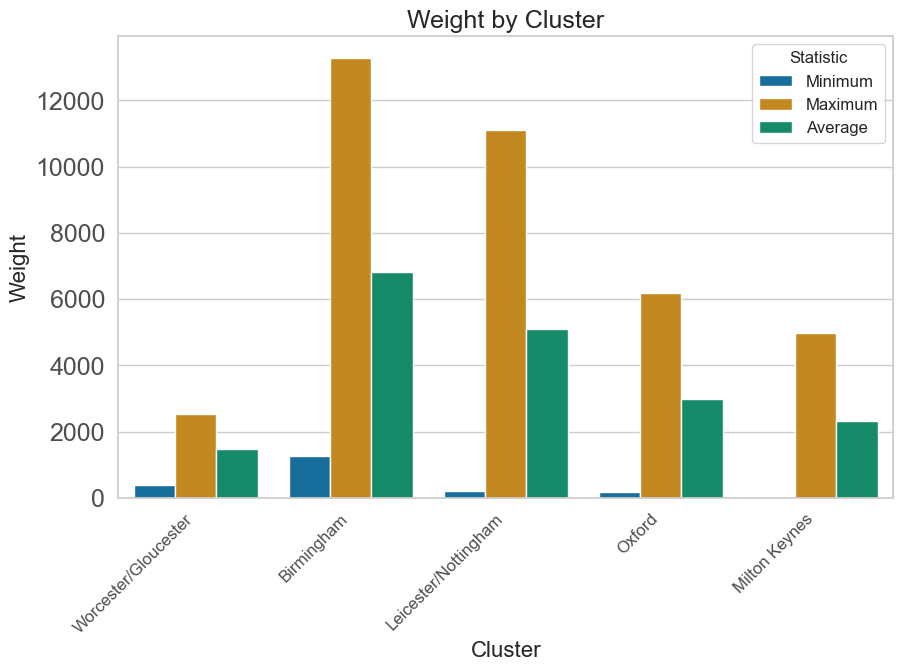

In [43]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_weight.melt(id_vars='Cluster Name',
                                        value_vars=['Minimum', 'Maximum', 'Average'],
                                        var_name='Statistic',
                                        value_name='Weight')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Weight', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Weight by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

#### Volume of freight, daily, by cluster

In [48]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily aggregate.
daily_aggregate = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])['Volume (m3)'].sum().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily aggregate.
cluster_volume = daily_aggregate.groupby('Cluster Label')['Volume (m3)'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Replace cluster labels with names.
cluster_volume['Cluster Label'] = cluster_volume['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_volume.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_volume

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,0.96,25.88,13.44
1,Birmingham,5.05,105.51,62.02
2,Leicester/Nottingham,3.02,92.32,43.75
3,Oxford,0.98,64.63,31.22
4,Milton Keynes,0.08,44.89,26.37


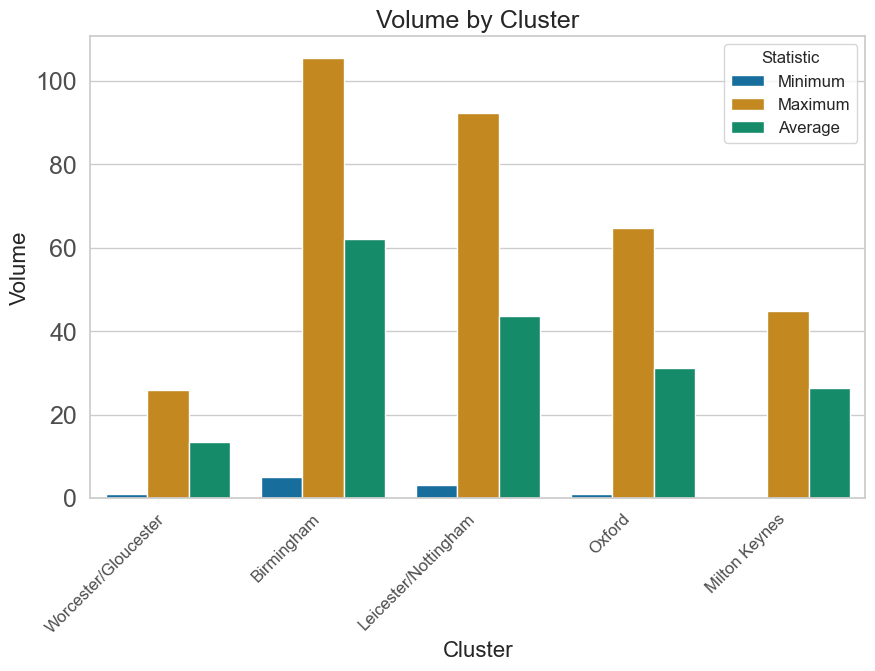

In [45]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_volume.melt(id_vars='Cluster Name',
                                  value_vars=['Minimum', 'Maximum', 'Average'],
                                  var_name='Statistic',
                                  value_name='Volume')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Volume', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.title('Volume by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

#### Pallets of freight, daily, by cluster

In [51]:
# Convert 'DateDespatched' to datetime.
clusters_wd['DateDespatched'] = pd.to_datetime(clusters_wd['DateDespatched'])

# Group by 'Cluster Label' and 'DateDespatched', calculate daily aggregate.
daily_aggregate = clusters_wd.groupby(['Cluster Label', 'DateDespatched'])['Pallets'].sum().reset_index()

# Group by 'Cluster Label', calculate minimum, maximum, and average daily aggregate.
cluster_pallets = daily_aggregate.groupby('Cluster Label')['Pallets'].\
agg(['min', 'max', 'mean']).round(2).reset_index()

# Replace cluster labels with names.
cluster_pallets['Cluster Label'] = cluster_pallets['Cluster Label'].map(cluster_names)

# Assign names to the columns.
cluster_pallets.columns = ['Cluster Name', 'Minimum', 'Maximum', 'Average']

# Print the resulting dataframe.
cluster_pallets

,Cluster Name,Minimum,Maximum,Average
0,Worcester/Gloucester,0.88,16.79,9.04
1,Birmingham,5.42,66.07,39.53
2,Leicester/Nottingham,1.55,60.24,29.05
3,Oxford,0.91,37.25,21.18
4,Milton Keynes,0.14,27.70,16.70


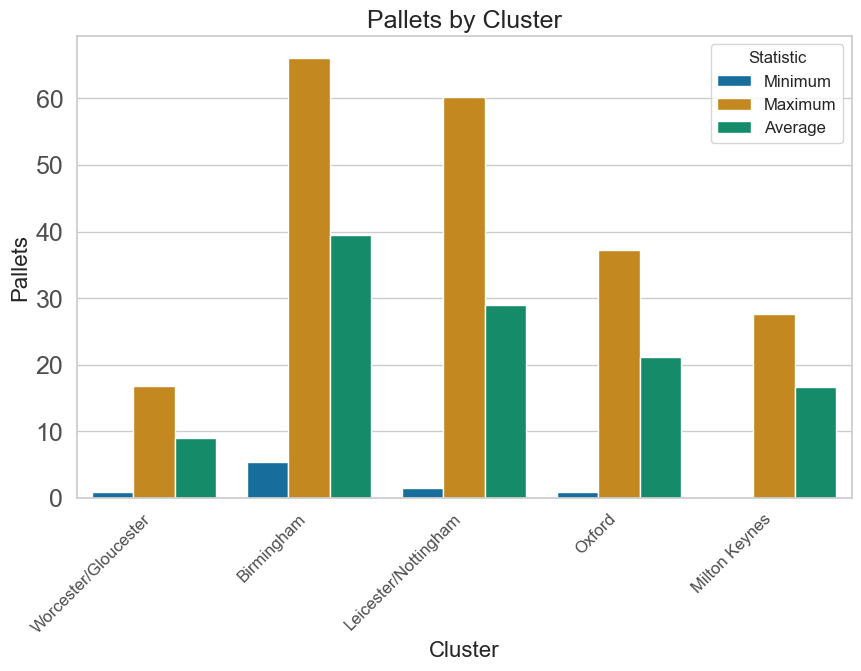

In [52]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Reshape the data for plotting
melted_data = cluster_pallets.melt(id_vars='Cluster Name',
                                   value_vars=['Minimum', 'Maximum', 'Average'],
                                   var_name='Statistic',
                                   value_name='Pallets')

# Plot the bars using Seaborn
sns.barplot(x='Cluster Name', y='Pallets', hue='Statistic', data=melted_data)

# Add labels and title
plt.xlabel('Cluster', fontsize=16)
plt.ylabel('Pallets', fontsize=16)
plt.title('Pallets by Cluster', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend
plt.legend(title='Statistic', fontsize=12)

# Show the plot
plt.show()

## Cluster '1' analysis

#### Deliveries by courier

In [58]:
# Count of deliveries by courier.
delivery_counts = cluster_1['Courier'].value_counts()
print(delivery_counts)

DX Express    474
DX Freight    460
MFS           321
Split          28
Name: Courier, dtype: int64


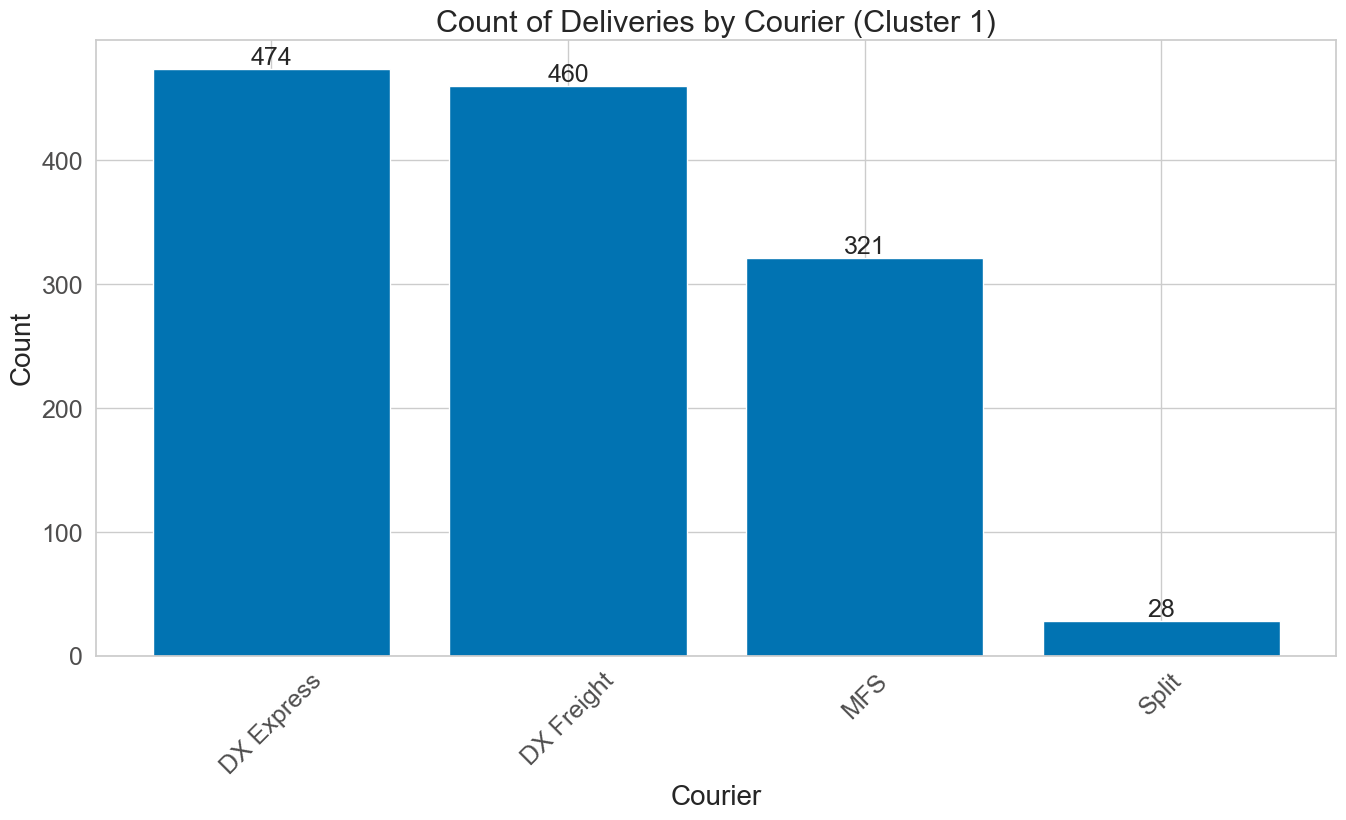

In [61]:
# Chart of breakdown of couriers.
delivery_counts = cluster_1['Courier'].value_counts()

plt.bar(delivery_counts.index, delivery_counts.values)
plt.xlabel('Courier')
plt.ylabel('Count')
plt.title('Count of Deliveries by Courier (Cluster 1)')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, count in enumerate(delivery_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# View the plot
plt.show()

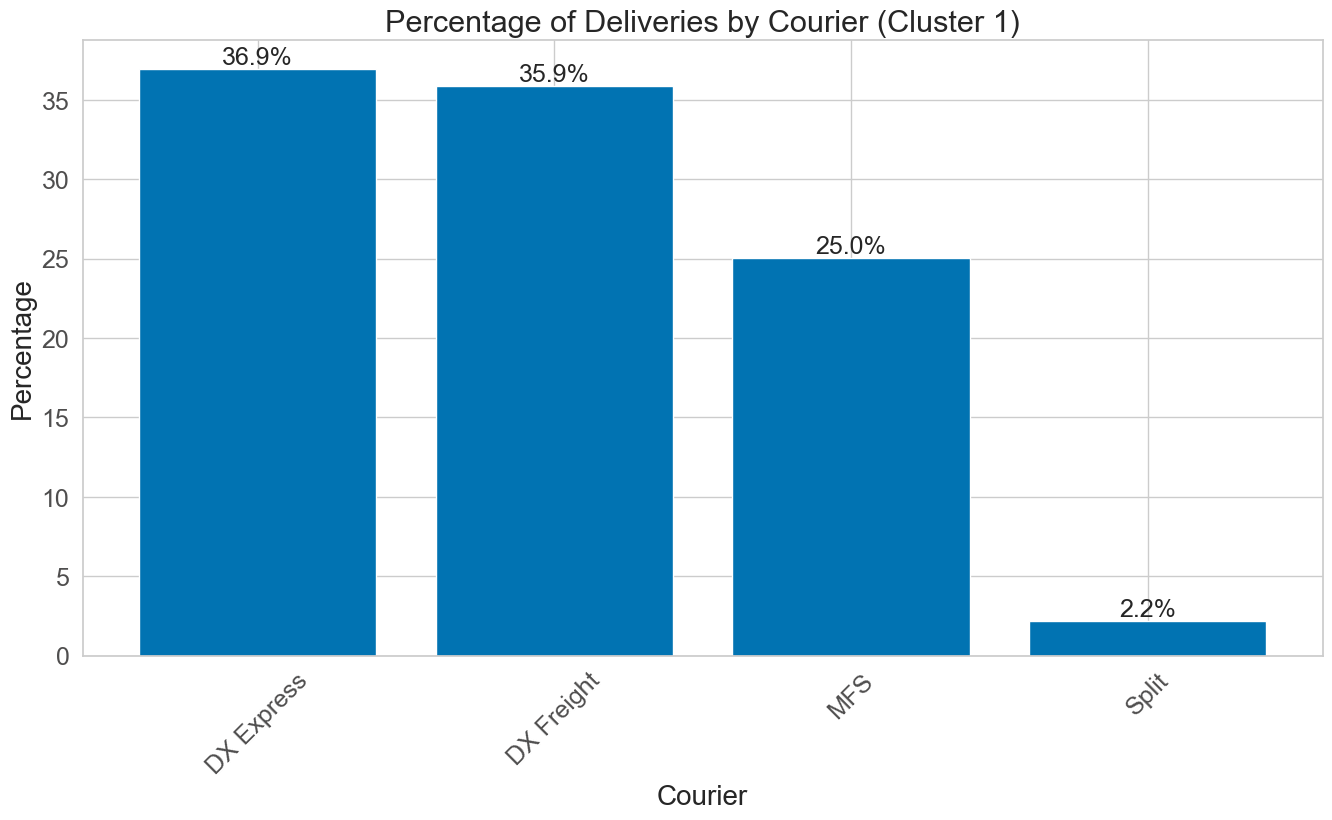

In [60]:
# Chart of percentage breakdown of couriers.
delivery_counts = cluster_1['Courier'].value_counts()
total_deliveries = len(cluster_1)

delivery_percentages = (delivery_counts / total_deliveries) * 100

plt.bar(delivery_percentages.index, delivery_percentages.values)
plt.xlabel('Courier')
plt.ylabel('Percentage')
plt.title('Percentage of Deliveries by Courier (Cluster 1)')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, percentage in enumerate(delivery_percentages.values):
    plt.text(i, percentage, f"{percentage:.1f}%", ha='center', va='bottom')

# View the plot.
plt.show()

#### Breakdown of deliveries by DateDespatched

In [62]:
grouped_cluster_1 = cluster_1.groupby('DateDespatched').agg({
    'Weight': 'sum',
    'Volume (m3)': 'sum',
    'Pallets': 'sum',
    'DeliveryExVAT': 'sum',
    'DeliveryCost': 'sum'
}).reset_index()

grouped_cluster_1

,DateDespatched,Weight,Volume (m3),Pallets,DeliveryExVAT,DeliveryCost
0,2023-03-27,6431.83,64.510685,39.597842,273.54,1722.23
1,2023-03-28,4994.56,52.471981,31.577577,274.64,1641.59
2,2023-03-29,4048.36,46.246708,27.223151,269.64,1378.82
3,2023-03-30,5929.43,52.496209,32.133072,334.68,1832.16
4,2023-03-31,6846.18,62.566264,35.723441,188.50,1579.51
5,2023-04-03,8682.84,82.192529,53.873029,516.04,2365.74
6,2023-04-04,8938.90,86.090205,60.955275,415.51,2739.92
7,2023-04-05,7542.76,64.452175,39.174143,288.24,1714.54
8,2023-04-06,4104.06,58.387123,37.187949,144.26,1414.99
9,2023-04-11,8553.16,102.729793,66.065803,502.25,2479.34


In [80]:
grouped_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DateDespatched  19 non-null     datetime64[ns]
 1   Weight          19 non-null     float64       
 2   Volume (m3)     19 non-null     float64       
 3   Pallets         19 non-null     float64       
 4   DeliveryExVAT   19 non-null     float64       
 5   DeliveryCost    19 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 1.0 KB


#### Key metrics

In [89]:
# Calculate the statistics across the entire dataset
statistics_c1 = pd.DataFrame({
    'Cluster Label': ['Cluster 1'],
    'Cluster Name': ['Birmingham'],
    'Min Weight': [grouped_cluster_1['Weight'].min()],
    '25th Percentile Weight': [np.percentile(grouped_cluster_1['Weight'], 25)],
    'Median Weight': [grouped_cluster_1['Weight'].median()],
    'Mean Weight': [grouped_cluster_1['Weight'].mean()],
    'Max Weight': [grouped_cluster_1['Weight'].max()],
    'Min Volume': [grouped_cluster_1['Volume (m3)'].min()],
    '25th Percentile Volume': [np.percentile(grouped_cluster_1['Volume (m3)'], 25)],
    'Median Volume': [grouped_cluster_1['Volume (m3)'].median()],
    'Mean Volume': [grouped_cluster_1['Volume (m3)'].mean()],
    'Max Volume': [grouped_cluster_1['Volume (m3)'].max()],
    'Min Pallets': [grouped_cluster_1['Pallets'].min()],
    '25th Percentile Pallets': [np.percentile(grouped_cluster_1['Pallets'], 25)],
    'Median Pallets': [grouped_cluster_1['Pallets'].median()],
    'Mean Pallets': [grouped_cluster_1['Pallets'].mean()],
    'Max Pallets': [grouped_cluster_1['Pallets'].max()]
})

# Format the values to 1 decimal place
statistics_c1 = statistics_c1.round(1)

# Reorder the columns
column_order = ['Cluster Label', 'Cluster Name', 'Min Weight', '25th Percentile Weight',
                'Median Weight', 'Mean Weight', 'Max Weight', 'Min Volume',
                '25th Percentile Volume', 'Median Volume', 'Mean Volume',
                'Max Volume', 'Min Pallets', '25th Percentile Pallets',
                'Median Pallets', 'Mean Pallets', 'Max Pallets']

statistics_c1 = statistics_c1[column_order]

# Print the statistics table
statistics_c1

,Cluster Label,Cluster Name,Min Weight,25th Percentile Weight,Median Weight,Mean Weight,Max Weight,Min Volume,25th Percentile Volume,Median Volume,Mean Volume,Max Volume,Min Pallets,25th Percentile Pallets,Median Pallets,Mean Pallets,Max Pallets
0,Cluster 1,Birmingham,1264.3,5462.0,6431.8,6825.9,13277.4,5.0,49.0,62.6,62.0,105.5,5.4,31.3,37.2,39.5,66.1


#### 'Weight' metrics

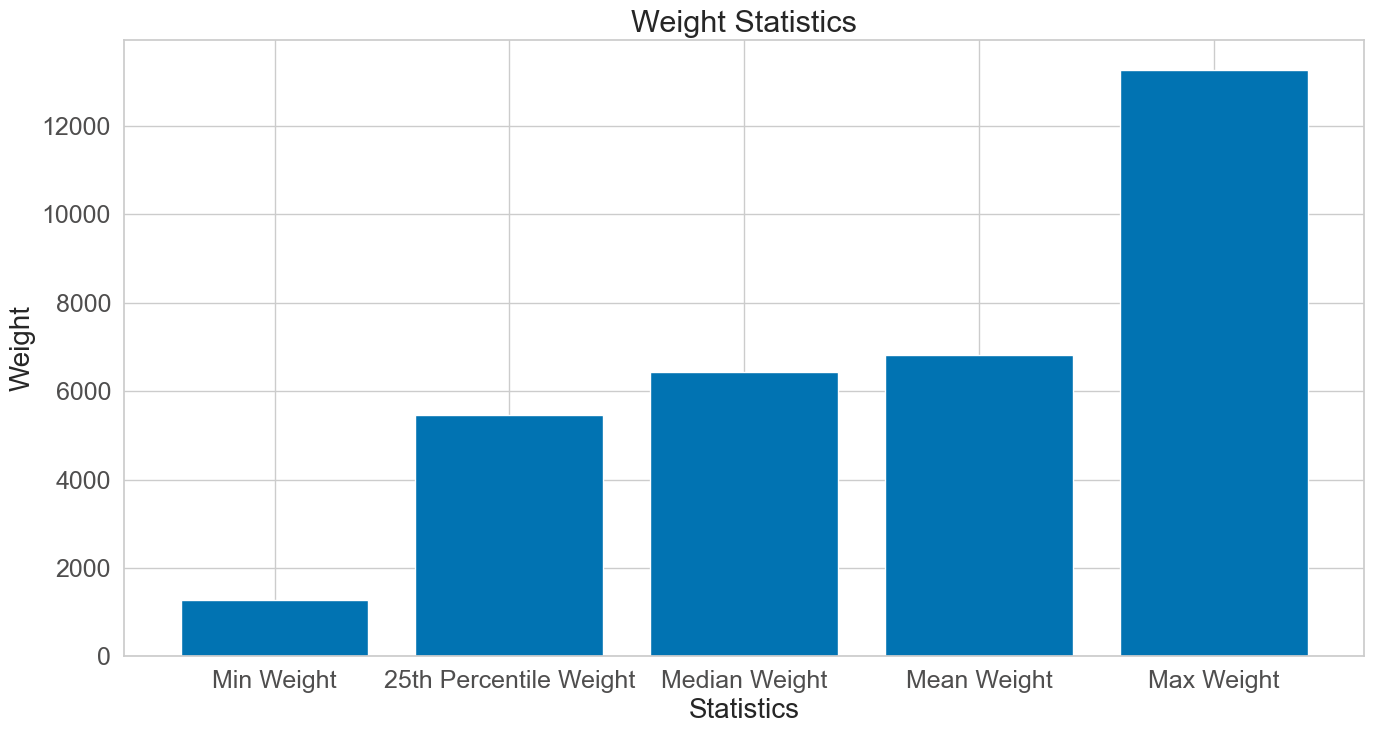

In [93]:
# Extract the weight statistics from the dataframe.
weight_stats = statistics_c1[['Min Weight', '25th Percentile Weight', 
                              'Median Weight', 'Mean Weight', 'Max Weight']]

# Set the x-axis labels.
labels = weight_stats.columns

# Set the values for each statistic.
values = weight_stats.values.flatten()

# Create a bar chart.
plt.bar(labels, values)

# Set the chart title and axis labels.
plt.title('Weight Statistics')
plt.xlabel('Statistics')
plt.ylabel('Weight')

# Show the chart.
plt.show()

#### 'Volume' statistics

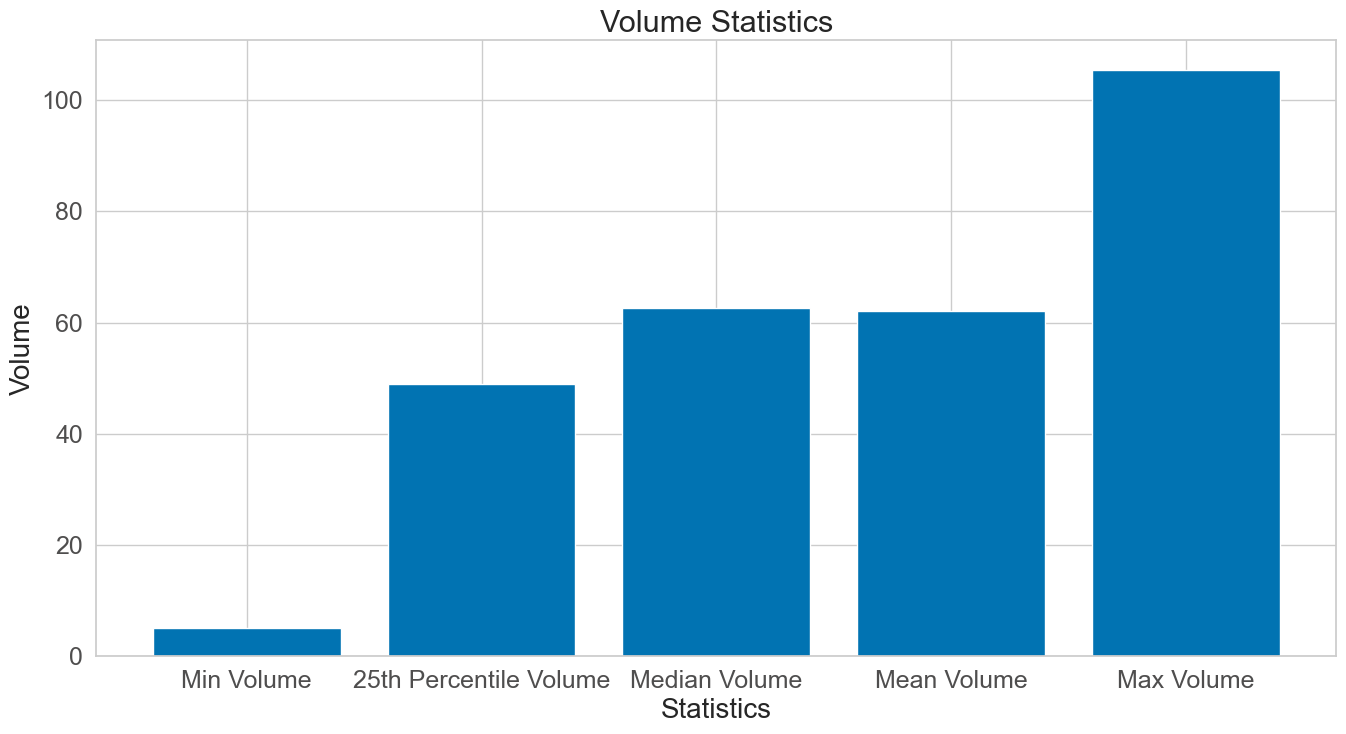

In [92]:
# Extract the volume statistics from the dataframe.
volume_stats = statistics_c1[['Min Volume', '25th Percentile Volume', 
                              'Median Volume', 'Mean Volume', 'Max Volume']]

# Set the x-axis labels.
labels = volume_stats.columns

# Set the values for each statistic.
values = volume_stats.values.flatten()

# Create a bar chart.
plt.bar(labels, values)

# Set the chart title and axis labels.
plt.title('Volume Statistics')
plt.xlabel('Statistics')
plt.ylabel('Volume')

# Show the chart.
plt.show()

#### 'Pallets' statistics

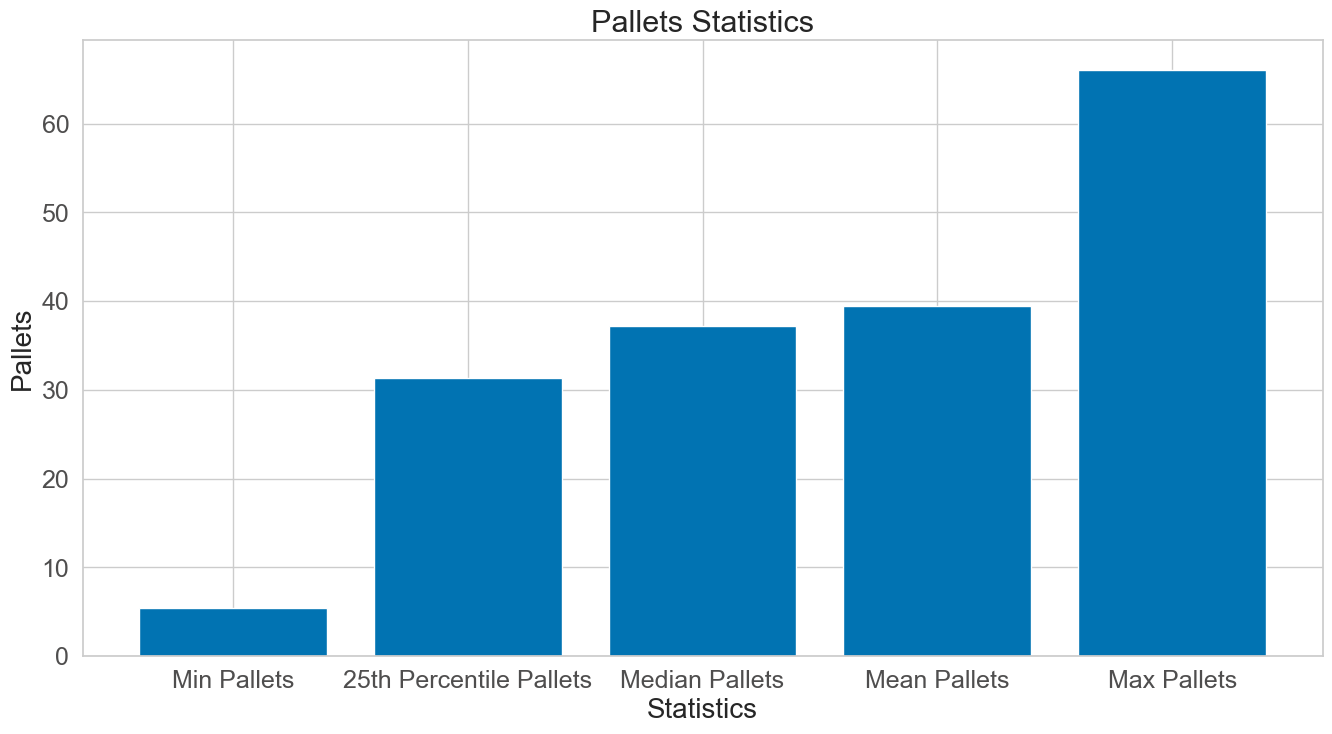

In [94]:
# Extract the pallets statistics from the dataframe.
pallets_stats = statistics_c1[['Min Pallets', '25th Percentile Pallets', 
                               'Median Pallets', 'Mean Pallets', 'Max Pallets']]

# Set the x-axis labels.
labels = pallets_stats.columns

# Set the values for each statistic.
values = pallets_stats.values.flatten()

# Create a bar chart.
plt.bar(labels, values)

# Set the chart title and axis labels.
plt.title('Pallets Statistics')
plt.xlabel('Statistics')
plt.ylabel('Pallets')

# Show the chart.
plt.show()

#### Weight of daily deliveries

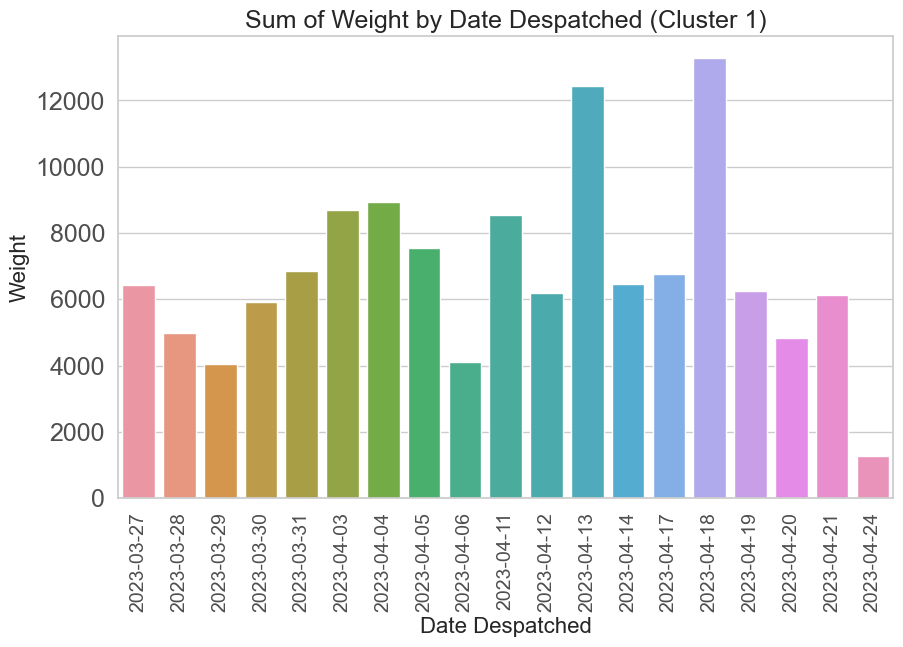

In [67]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Weight', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Weight by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

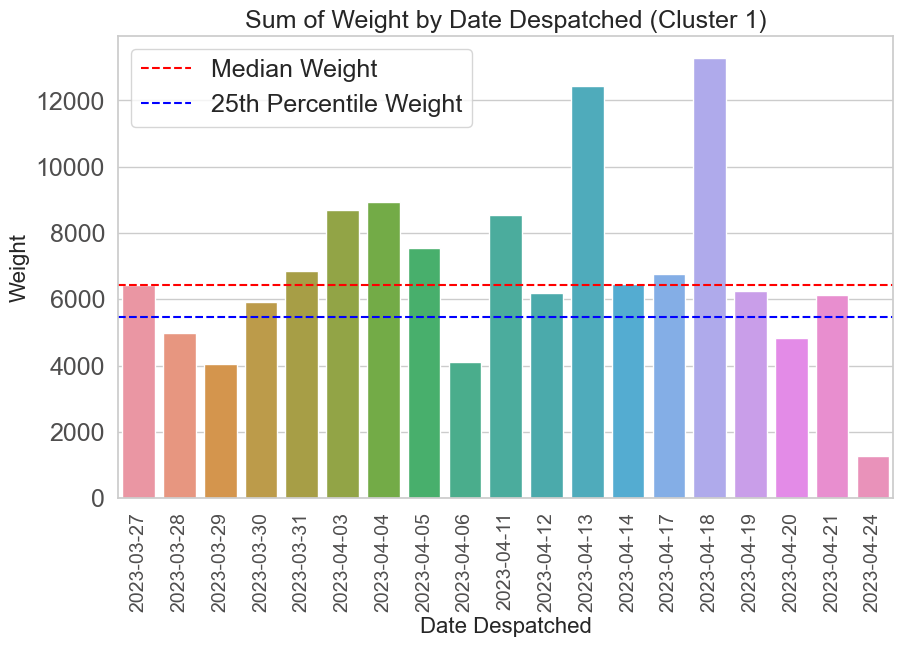

In [96]:
# Add in lines for the median and 25th percentile lines.

# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Weight', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Weight by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Calculate and add the median and 25th percentile lines
median_weight = grouped_cluster_1['Weight'].median()
percentile_25 = np.percentile(grouped_cluster_1['Weight'], 25)

plt.axhline(median_weight, color='red', linestyle='--', label='Median Weight')
plt.axhline(percentile_25, color='blue', linestyle='--', label='25th Percentile Weight')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### Volume of daily deliveries

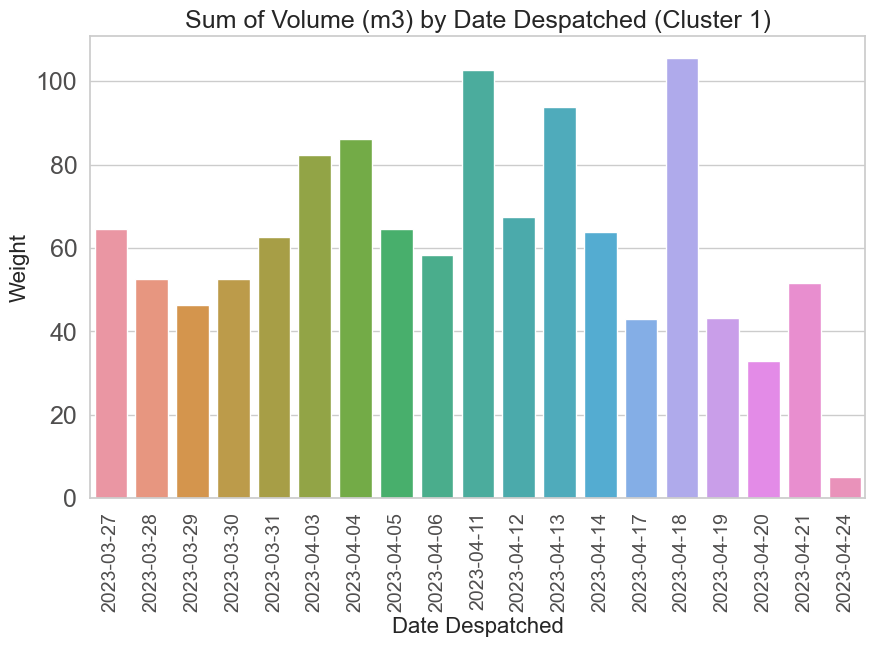

In [68]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Volume (m3)', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Volume (m3) by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

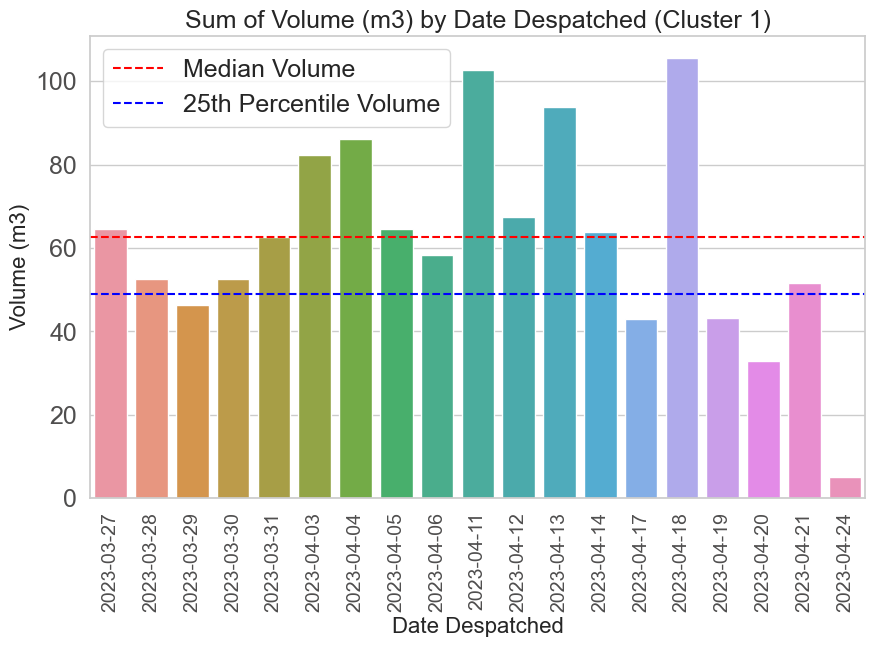

In [98]:
# Add in lines for the median and 25th percentile lines.

# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Volume (m3)', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Volume (m3)', fontsize=16)
plt.title('Sum of Volume (m3) by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Calculate and add the median and 25th percentile lines
median_volume = grouped_cluster_1['Volume (m3)'].median()
percentile_25_volume = np.percentile(grouped_cluster_1['Volume (m3)'], 25)

plt.axhline(median_volume, color='red', linestyle='--', label='Median Volume')
plt.axhline(percentile_25_volume, color='blue', linestyle='--', label='25th Percentile Volume')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### Pallets of daily deliveries

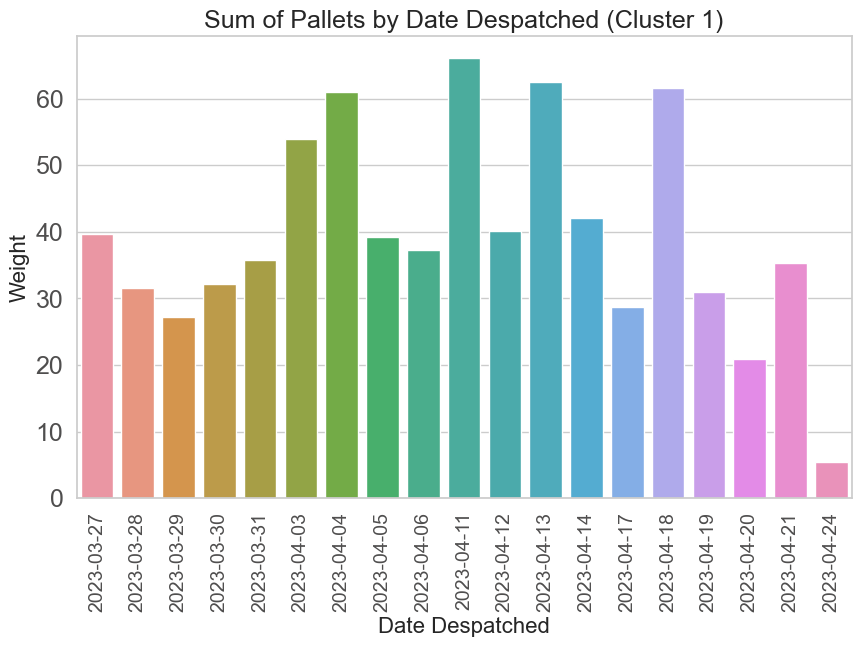

In [69]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Pallets', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Pallets by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

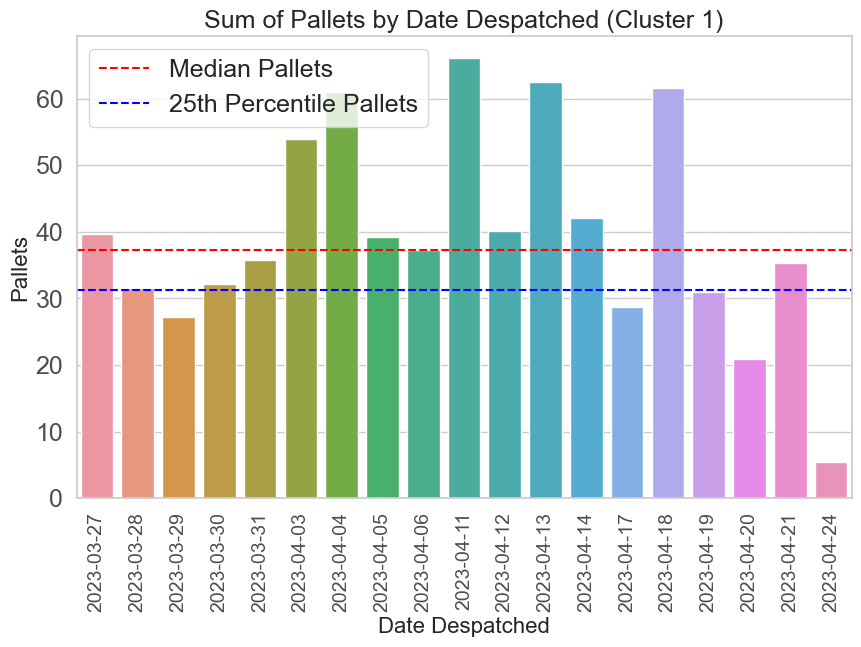

In [99]:
# Add in lines for the median and 25th percentile lines.

# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1['DateDespatched'] = pd.to_datetime(grouped_cluster_1['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1['DateDespatched'].dt.date, 
            y='Pallets', 
            data=grouped_cluster_1)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Pallets', fontsize=16)
plt.title('Sum of Pallets by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Calculate and add the median and 25th percentile lines
median_pallets = grouped_cluster_1['Pallets'].median()
percentile_25_pallets = np.percentile(grouped_cluster_1['Pallets'], 25)

plt.axhline(median_pallets, color='red', linestyle='--', label='Median Pallets')
plt.axhline(percentile_25_pallets, color='blue', linestyle='--', label='25th Percentile Pallets')

# Show the legend
plt.legend()

# Show the plot
plt.show()

## Cluster 1 ex DX Express

In [71]:
# Create a new dataset without the specified courier.
cluster_1_no_dxe = cluster_1[cluster_1['Courier'] != 'DX Express']

# View the dataframe.
cluster_1_no_dxe

,Unnamed: 0,distance,OrderID,WebsiteID,OrderDate,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,day_of_week,DeliveryCost,Weight,Volume (m3),Pallets,id,Outward Code,latitude,longitude,Cluster Label
0,0,26.84,2295440,7700,2023/04/18,MFS,375.40,0.00,2023-04-18,Tuesday,34.46,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682,1
1,1,26.84,2277415,67940,2023/03/28,DX Freight,236.61,0.00,2023-03-28,Tuesday,16.45,33.30,0.959000,0.473039,766,DY6,52.496759,-2.173682,1
2,2,26.84,2279524,67940,2023/03/30,DX Freight,70.58,13.20,2023-03-30,Thursday,11.79,21.80,0.209100,0.222222,766,DY6,52.496759,-2.173682,1
5,5,26.84,2292112,778040,2023/04/14,DX Freight,104.00,0.00,2023-04-14,Friday,20.55,44.20,0.123500,0.054167,766,DY6,52.496759,-2.173682,1
6,6,26.84,2298627,846996,2023/04/21,DX Freight,111.36,0.00,2023-04-21,Friday,23.25,51.12,0.129600,0.100000,766,DY6,52.496759,-2.173682,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,4096,46.24,2289999,785183,2023/04/12,DX Freight,1299.84,0.00,2023-04-20,Thursday,48.28,116.77,2.970782,1.416867,2524,ST12,52.948000,-2.171000,1
4098,4098,28.27,2295696,841091,2023/04/18,DX Freight,186.19,0.00,2023-04-19,Wednesday,14.00,27.34,0.279677,0.273069,2933,WV3,52.579470,-2.156364,1
4099,4099,13.42,2299296,810864,2023/04/21,DX Freight,127.86,0.00,2023-04-24,Monday,18.63,39.99,0.236965,0.187738,82,B47,52.392856,-1.878858,1
4107,4107,19.60,2292974,893554,2023/04/16,DX Freight,109.80,0.00,2023-04-17,Monday,34.03,80.00,0.132400,0.111111,96,B68,52.482799,-2.000643,1


In [72]:
# Count of deliveries by courier.
delivery_counts = cluster_1_no_dxe['Courier'].value_counts()
print(delivery_counts)

DX Freight    460
MFS           321
Split          28
Name: Courier, dtype: int64


#### Breakdown of deliveries by DateDespatched

In [74]:
grouped_cluster_1_no_dxe = cluster_1_no_dxe.groupby('DateDespatched').agg({
    'Weight': 'sum',
    'Volume (m3)': 'sum',
    'Pallets': 'sum',
    'DeliveryExVAT': 'sum',
    'DeliveryCost': 'sum'
}).reset_index()

grouped_cluster_1_no_dxe

,DateDespatched,Weight,Volume (m3),Pallets,DeliveryExVAT,DeliveryCost
0,2023-03-27,6085.22,63.010366,38.252106,137.94,1561.68
1,2023-03-28,4655.93,50.921280,30.097933,155.30,1469.44
2,2023-03-29,3643.41,44.408904,25.875409,112.66,1155.77
3,2023-03-30,5503.92,50.590373,30.604619,184.24,1612.40
4,2023-03-31,6545.02,61.112631,34.749950,59.97,1419.92
5,2023-04-03,8274.88,79.606859,52.090649,310.79,2120.50
6,2023-04-04,8492.52,83.820526,59.073879,204.92,2460.60
7,2023-04-05,7210.06,62.934045,37.945566,169.70,1556.93
8,2023-04-06,3823.51,57.064986,35.859555,72.26,1272.26
9,2023-04-11,8140.87,100.333407,64.183745,238.94,2240.90


#### Weight of daily deliveries

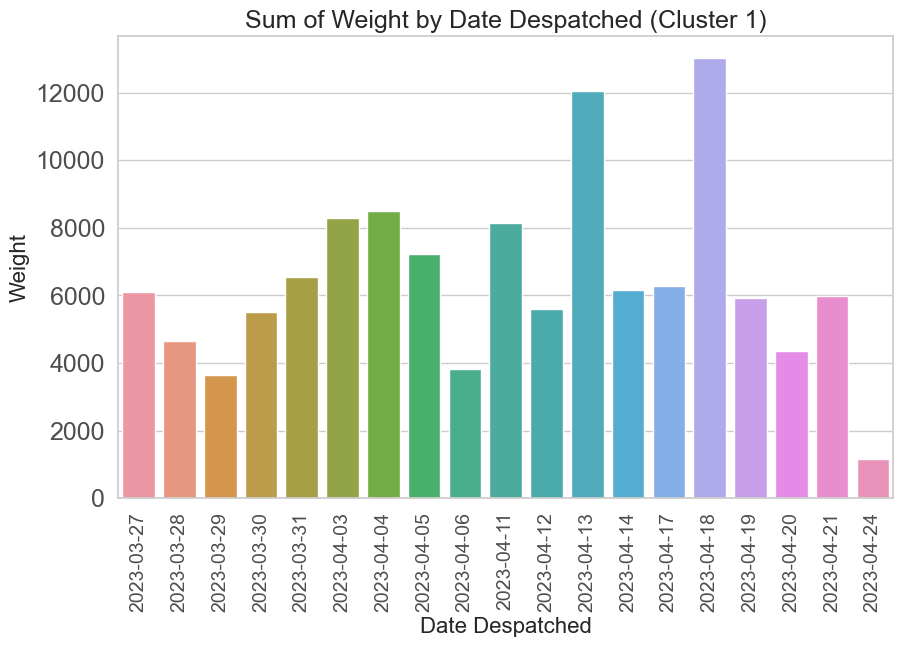

In [75]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1_no_dxe['DateDespatched'] = pd.to_datetime(grouped_cluster_1_no_dxe['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1_no_dxe['DateDespatched'].dt.date, 
            y='Weight', 
            data=grouped_cluster_1_no_dxe)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Weight by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

#### Volume of daily deliveries

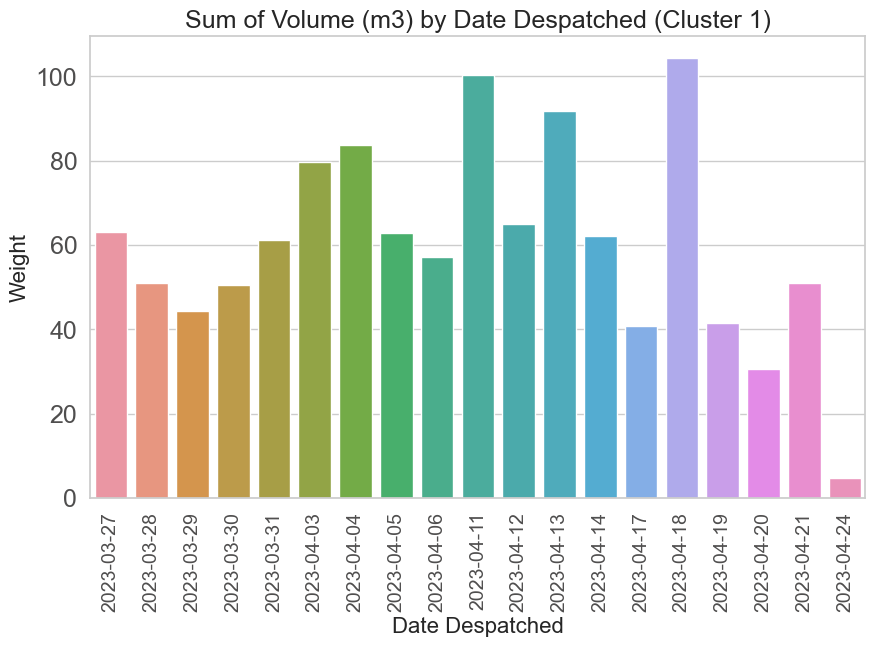

In [76]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1_no_dxe['DateDespatched'] = pd.to_datetime(grouped_cluster_1_no_dxe['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1_no_dxe['DateDespatched'].dt.date, 
            y='Volume (m3)', 
            data=grouped_cluster_1_no_dxe)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Volume (m3) by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

#### Pallets of daily deliveries

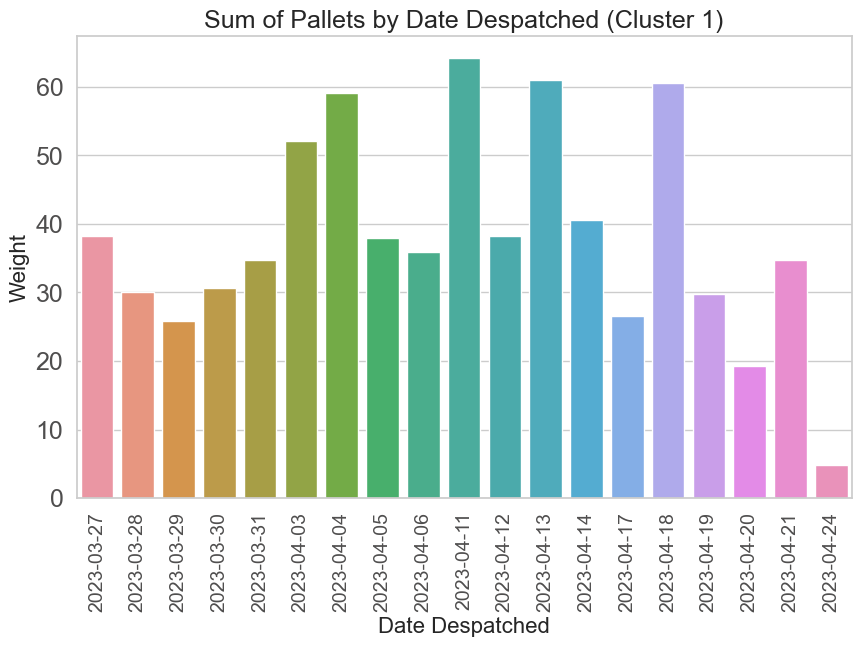

In [79]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_1_no_dxe['DateDespatched'] = pd.to_datetime(grouped_cluster_1_no_dxe['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_1_no_dxe['DateDespatched'].dt.date, 
            y='Pallets', 
            data=grouped_cluster_1_no_dxe)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Pallets by Date Despatched (Cluster 1)', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

## Cluster '0' analysis

#### Deliveries by courier

In [53]:
# Count of deliveries by courier.
delivery_counts = cluster_0['Courier'].value_counts()
print(delivery_counts)

DX Freight    150
DX Express    147
MFS            78
Split           7
Name: Courier, dtype: int64


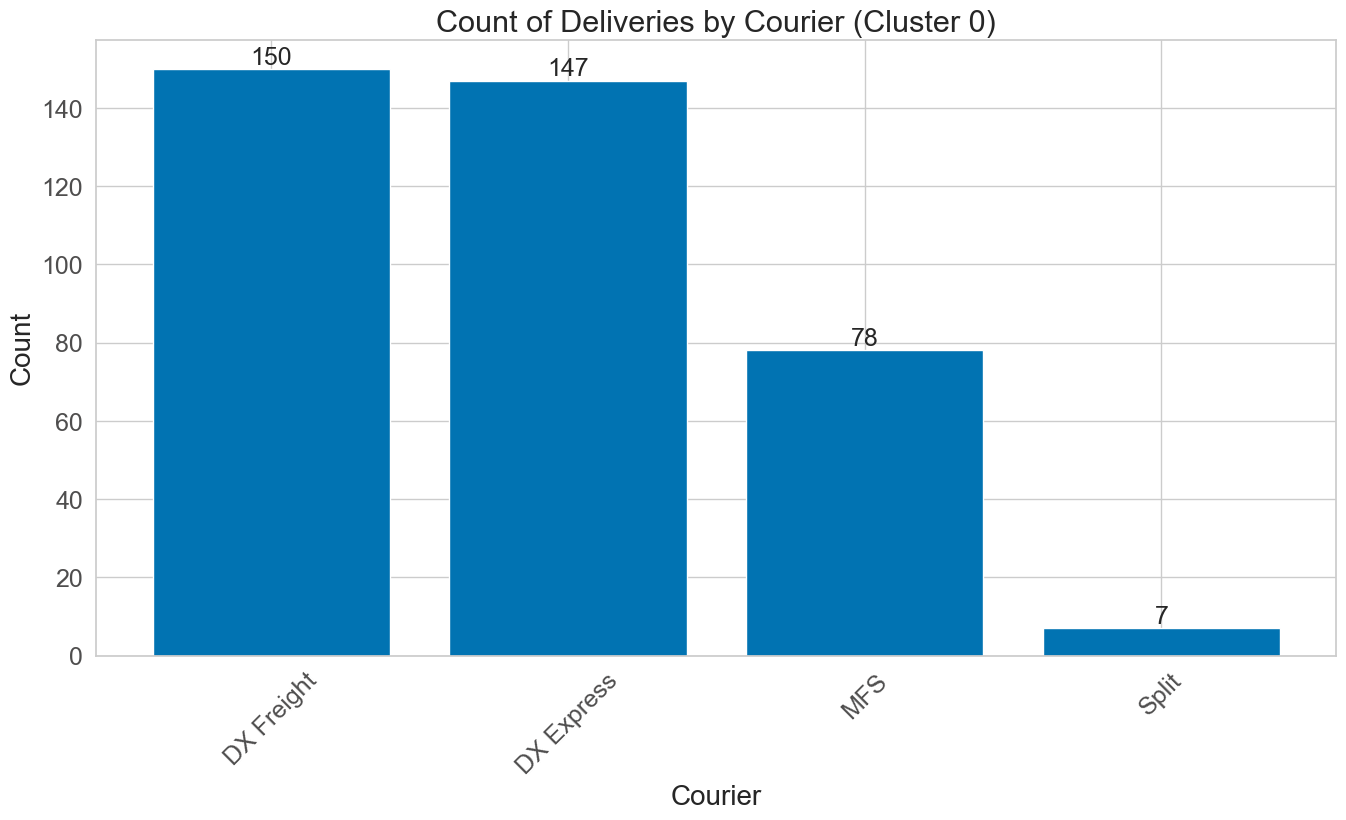

In [54]:
# Chart of breakdown of couriers.
delivery_counts = cluster_0['Courier'].value_counts()

plt.bar(delivery_counts.index, delivery_counts.values)
plt.xlabel('Courier')
plt.ylabel('Count')
plt.title('Count of Deliveries by Courier (Cluster 0)')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, count in enumerate(delivery_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# View the plot
plt.show()

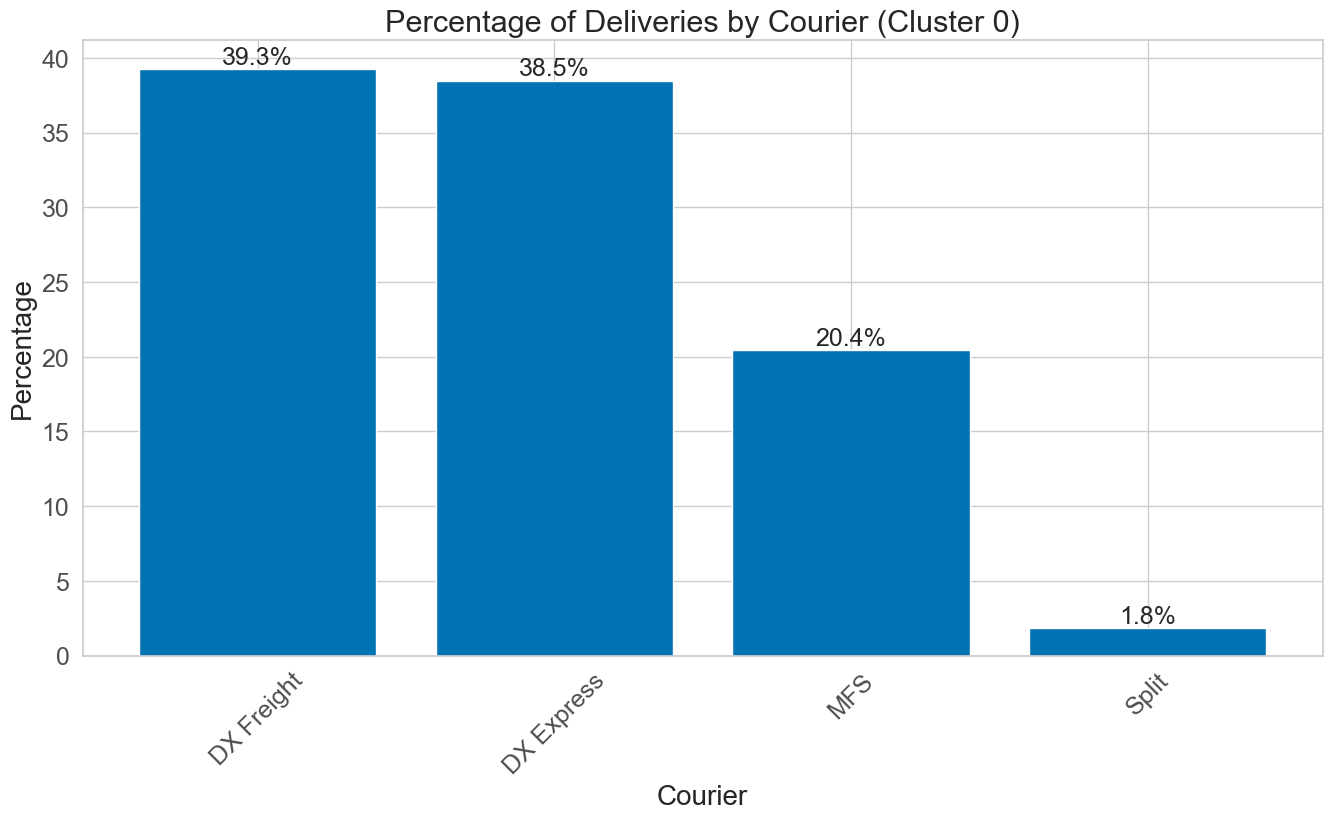

In [55]:
# Chart of percentage breakdown of couriers.
delivery_counts = cluster_0['Courier'].value_counts()
total_deliveries = len(cluster_0)

delivery_percentages = (delivery_counts / total_deliveries) * 100

plt.bar(delivery_percentages.index, delivery_percentages.values)
plt.xlabel('Courier')
plt.ylabel('Percentage')
plt.title('Percentage of Deliveries by Courier (Cluster 0)')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, percentage in enumerate(delivery_percentages.values):
    plt.text(i, percentage, f"{percentage:.1f}%", ha='center', va='bottom')

# View the plot.
plt.show()

#### Breakdown of deliveries by DateDespatched

In [56]:
grouped_cluster_0 = cluster_0.groupby('DateDespatched').agg({
    'Weight': 'sum',
    'Volume (m3)': 'sum',
    'Pallets': 'sum',
    'DeliveryExVAT': 'sum',
    'DeliveryCost': 'sum'
}).reset_index()

grouped_cluster_0

,DateDespatched,Weight,Volume (m3),Pallets,DeliveryExVAT,DeliveryCost
0,2023-03-27,974.27,7.780666,5.079077,84.19,400.28
1,2023-03-28,575.02,10.572509,6.066943,99.22,281.07
2,2023-03-29,2532.81,21.421539,16.604485,119.30,784.46
3,2023-03-30,805.32,7.443202,4.476038,42.48,309.73
4,2023-03-31,1000.21,14.114721,8.841516,68.27,438.61
5,2023-04-03,1112.09,13.230888,9.436697,107.73,466.02
6,2023-04-04,2018.73,16.370052,12.167812,93.52,538.77
7,2023-04-05,2542.48,25.879257,16.789689,76.78,828.84
8,2023-04-06,2220.68,23.344586,9.878486,113.18,551.28
9,2023-04-11,1491.24,9.462528,7.110013,81.51,412.21


#### Weight of daily deliveries

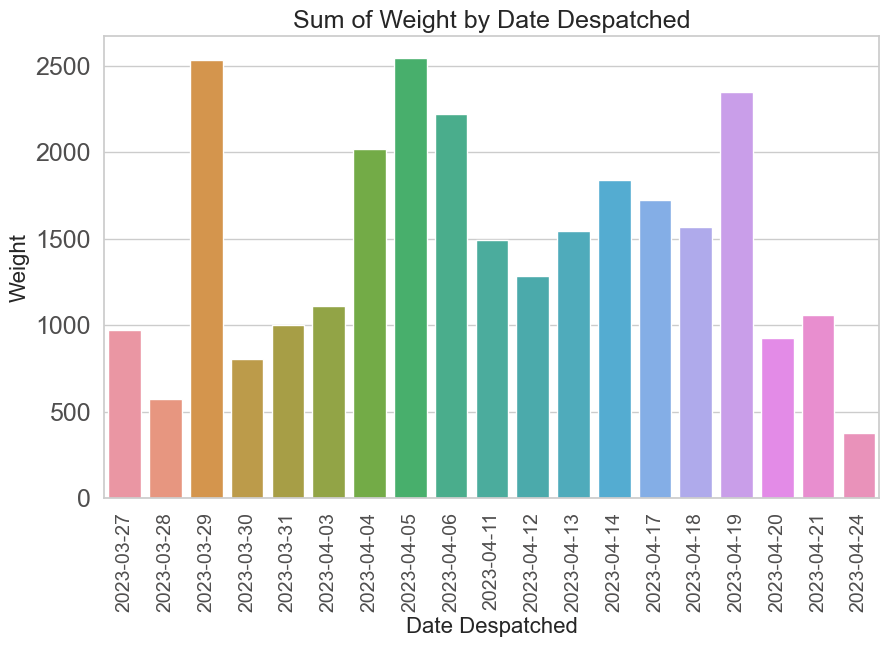

In [57]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_0['DateDespatched'] = pd.to_datetime(grouped_cluster_0['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_0['DateDespatched'].dt.date, 
            y='Weight', 
            data=grouped_cluster_0)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Weight by Date Despatched', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

#### Volume of daily deliveries

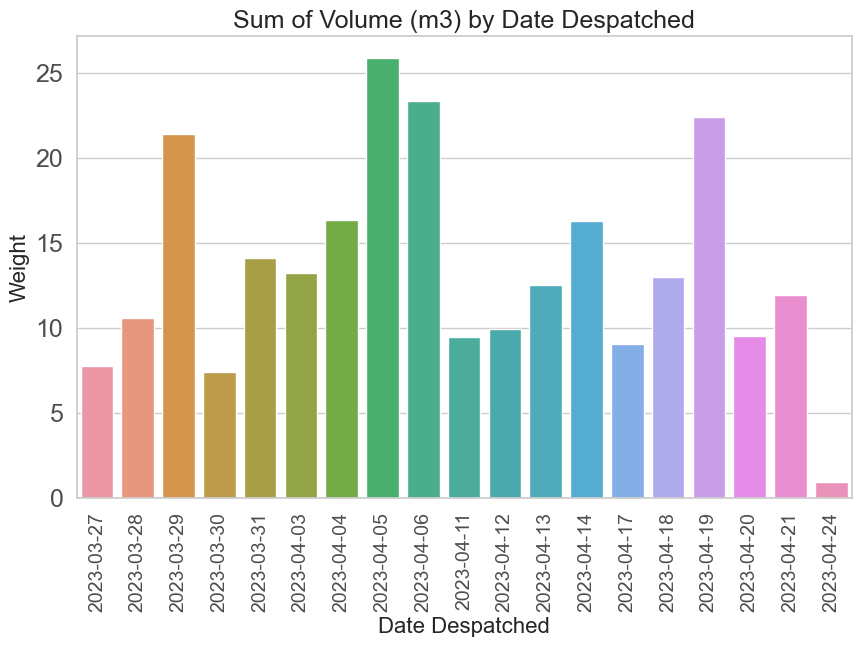

In [34]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_0['DateDespatched'] = pd.to_datetime(grouped_cluster_0['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_0['DateDespatched'].dt.date, 
            y='Volume (m3)', 
            data=grouped_cluster_0)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Volume (m3) by Date Despatched', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

#### Pallets of daily deliveries

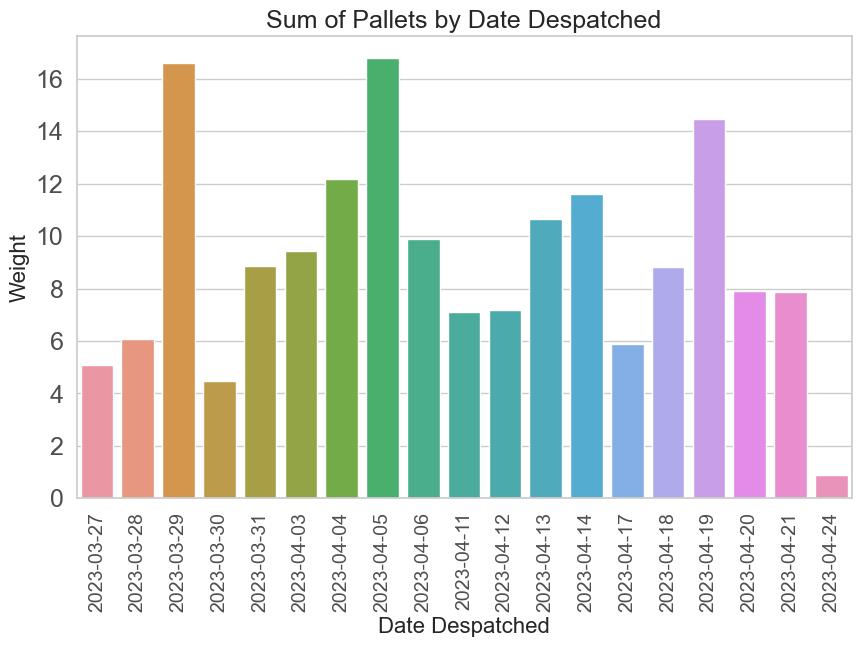

In [35]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_0['DateDespatched'] = pd.to_datetime(grouped_cluster_0['DateDespatched'])

# Plot the bars using Seaborn
sns.barplot(x=grouped_cluster_0['DateDespatched'].dt.date, 
            y='Pallets', 
            data=grouped_cluster_0)

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Weight', fontsize=16)
plt.title('Sum of Pallets by Date Despatched', fontsize=18)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=14)

# Show the plot
plt.show()

#### Delivery charge vs delivery cost of daily deliveries

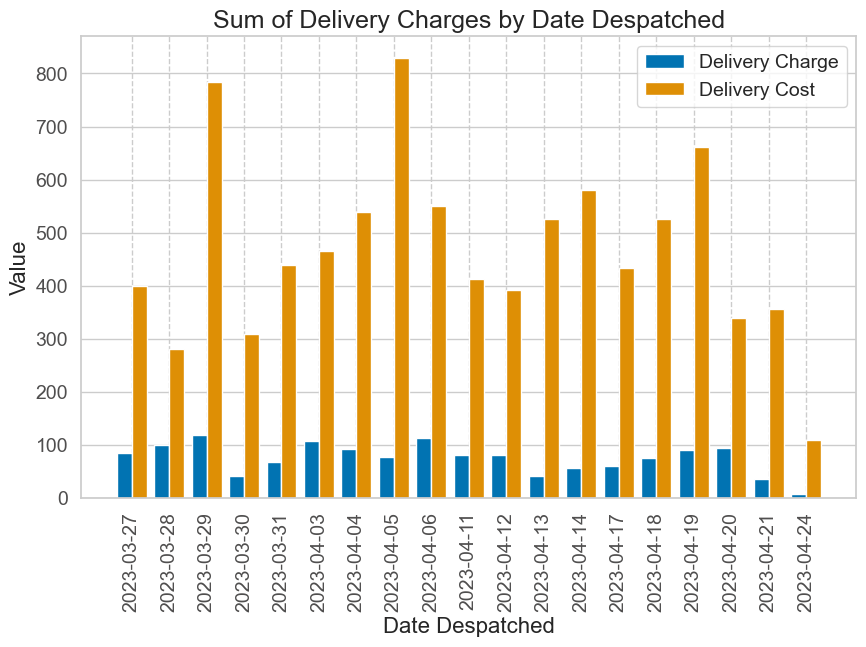

In [36]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Convert the 'DateDespatched' column to datetime
grouped_cluster_0['DateDespatched'] = pd.to_datetime(grouped_cluster_0['DateDespatched'])

# Calculate the number of bars
num_bars = len(grouped_cluster_0)

# Set the width of each bar
bar_width = 0.4

# Calculate the x-values for the bars
x = np.arange(num_bars)

# Plot the bars for DeliveryExVAT
plt.bar(x, grouped_cluster_0['DeliveryExVAT'], width=bar_width, label='Delivery Charge')

# Plot the bars for DeliveryCost
plt.bar(x + bar_width, grouped_cluster_0['DeliveryCost'], width=bar_width, label='Delivery Cost')

# Remove the vertical gridlines
plt.grid(axis='x', linestyle='--')

# Add labels and title
plt.xlabel('Date Despatched', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.title('Sum of Delivery Charges by Date Despatched', fontsize=18)

# Set the x-axis tick labels
plt.xticks(x + bar_width / 2, grouped_cluster_0['DateDespatched'].dt.date, rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Specify legend labels
plt.legend(labels=['Delivery Charge', 'Delivery Cost'], fontsize=14)

# Show the plot
plt.show()